# Machine learning and statistical learning

## K-Nearest Neighbors

## Thu Ha MAI - M2 EBDS

### 1. Context

**In this Notebook, I will build a classifier using the K-Nearest Neighbors algorithm.**

### 2. Lab setup: generating data

**1. Draw n = 50 observations in a unit square. To do so:**

• Randomly generate 50 observations from a Beta distribution with parameters α = β = 1 and store the drawn values in an object I call x.

• Do the same procedure and store the draws in an object I call y.

In [1]:
import numpy as np

# x = np.random.beta(a, b, size)

x = np.random.beta(1, 1, 50)
print(x)
y = np.random.beta(1, 1, 50)
print(y)

[0.68960419 0.77597662 0.8759765  0.03287548 0.15417192 0.76750033
 0.66585046 0.41702684 0.46542259 0.80009416 0.26484591 0.13149392
 0.24417835 0.41453624 0.90293655 0.98774048 0.6283905  0.56883108
 0.68593371 0.44284032 0.6344414  0.6257148  0.11404695 0.64189834
 0.44941067 0.57722109 0.174189   0.6196735  0.56419069 0.41914037
 0.65585511 0.39174354 0.15700715 0.81953719 0.79490503 0.98933475
 0.02289607 0.12718415 0.02701666 0.1768639  0.95052199 0.58795646
 0.96350564 0.69252564 0.22902869 0.48176242 0.28345923 0.60235012
 0.51552635 0.52307238]
[0.28795454 0.6822274  0.99794898 0.96630944 0.59698826 0.89537991
 0.74859275 0.12601808 0.72751959 0.00843717 0.72595016 0.48770378
 0.73282217 0.59748534 0.05497455 0.99338272 0.43284064 0.58036997
 0.8264016  0.21788385 0.7314683  0.92970365 0.49013583 0.91530993
 0.21290272 0.22608808 0.86718934 0.80307502 0.33743128 0.24269647
 0.10753166 0.02877405 0.48606692 0.98194786 0.35388495 0.08837337
 0.67093493 0.60591981 0.85872068 0.78

**2. Create a vector called true_label of size n = 50 which will contain the true labels: “orange” or “blue”.**

• “orange” if x + y ≥ 1

• “blue” otherwise.

In [2]:
true_label = []

for i in range(50):
    if x[i] + y[i] >= 1:
       true_label.append("orange")
    else:
        true_label.append("blue")
        
print(true_label)

['blue', 'orange', 'orange', 'blue', 'blue', 'orange', 'orange', 'blue', 'orange', 'blue', 'blue', 'blue', 'blue', 'orange', 'blue', 'orange', 'orange', 'orange', 'orange', 'blue', 'orange', 'orange', 'blue', 'orange', 'blue', 'blue', 'orange', 'orange', 'blue', 'blue', 'blue', 'blue', 'blue', 'orange', 'orange', 'orange', 'blue', 'blue', 'blue', 'blue', 'orange', 'blue', 'orange', 'orange', 'blue', 'blue', 'blue', 'blue', 'orange', 'orange']


**3. Create a new point (x0, y0) at which I will try to assign a label later on, depending on the values of the nearest neighbors. For example: (x0 = 0.75, y0 = 0.5).**

In [3]:
x0 = 0.75
y0 = 0.5

**4. I create a matrix with 3 columns: the x and y coordinates of your generated points, and the assigned label.**

In [4]:
matrix = np.array((x, y, true_label)).T # T for transpose
print(matrix)

[['0.6896041879862339' '0.28795453626668693' 'blue']
 ['0.775976620544169' '0.6822274035883185' 'orange']
 ['0.8759764985147169' '0.9979489772326912' 'orange']
 ['0.03287548094647023' '0.9663094364296686' 'blue']
 ['0.15417192023791187' '0.596988262445039' 'blue']
 ['0.767500331804544' '0.8953799078398433' 'orange']
 ['0.6658504555553756' '0.7485927466572512' 'orange']
 ['0.41702683649454664' '0.12601808096851796' 'blue']
 ['0.4654225903771782' '0.7275195897239226' 'orange']
 ['0.8000941592186867' '0.008437166411177198' 'blue']
 ['0.2648459052798348' '0.7259501646224985' 'blue']
 ['0.13149391664189966' '0.4877037817333689' 'blue']
 ['0.24417835171755278' '0.7328221678514764' 'blue']
 ['0.41453623885123303' '0.5974853425197141' 'orange']
 ['0.9029365516785564' '0.054974549828837975' 'blue']
 ['0.9877404820699175' '0.9933827170246077' 'orange']
 ['0.6283905001932043' '0.4328406415826899' 'orange']
 ['0.5688310838456867' '0.5803699668266495' 'orange']
 ['0.6859337119497525' '0.82640160283

**5. I plot my 50 observations on a scatter plot and add the new (x0, y0) observation using a different color/shape.**

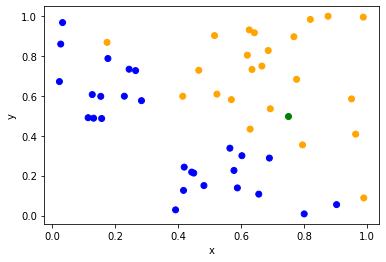

In [5]:
import matplotlib.pyplot as plt

plt.scatter(x, y, c = true_label)
plt.scatter(x0, y0, c = "green")
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### 3. The algorithm

**1. To know which are the K closests points of my new observation, I will compute the distance between each point of my dataset and my new observation. To do that, I create a function that computes the distances between two points:**

• This function will require four parameters: the two coordinates of a first point (xA and yA) and the two coordinates of a second point (xB and yB).

• The function will return the Euclidean distance between the two points whose coordinates are given as parameters.

In [6]:
# Create a function that computes the distances between two points

from scipy.spatial import distance

def Euclidean(xA, yA, xB, yB):
    a = np.array([xA, yA]).astype(float)
    b = np.array([xB, yB]).astype(float)
    return distance.euclidean(a, b)

In [7]:
# The element of the 1st column and 1st row

print(matrix[0, 0])

# The element of the 2nd column and 1st row

print(matrix[0, 1])

# matrix[i-th row, i-th column]

0.37615548968365664
0.14356345879557728


**2. Using a loop, I apply this function to my new point (x0, y0) and each of the points in my dataset. In other words, at iteration i, I store the Euclidean distance between my point (x0, y0) and the i-th point from my data, i.e., (xi, yi). Once I have computed the distance from my point (x0, y0) to all points from my dataset, order my dataset by increasing distances to my new point.**

In [7]:
Distance = []

for i in range(50):
    result = Euclidean(x0, y0, matrix[i, 0], matrix[i, 1])
    Distance.append(result)
    
print(Distance)
print(len(Distance))

[0.22047887154708942, 0.18406958312941235, 0.5136372865214437, 0.8554016988123835, 0.6036702938567418, 0.39576701875814785, 0.26244904176017503, 0.5007330659915514, 0.36434800092188974, 0.4941087371760388, 0.5351896603230272, 0.6186282988472463, 0.5568318433012185, 0.3493412759040405, 0.4705711849862602, 0.5476742118024372, 0.13892174007794375, 0.1981956299928062, 0.33262966734409866, 0.417057062186996, 0.25871096453169895, 0.4473164831798928, 0.6360295488541963, 0.429148349462047, 0.41566668500604365, 0.32385226938586065, 0.682924831077959, 0.32990826749687524, 0.24688800785000162, 0.4191338695826121, 0.4036021045761546, 0.5919472866307107, 0.593156511841784, 0.4869385626401336, 0.15285964471138702, 0.4761487243170706, 0.7469262879643846, 0.6317583360479594, 0.8070845278586729, 0.6407025750428479, 0.21750466123734946, 0.39601510469964, 0.23257866355287882, 0.06709368582732676, 0.5300642623215517, 0.4406429296877122, 0.4725878173222729, 0.24866963761652844, 0.464592485074363, 0.2512935

In [8]:
# Add the list of Distance to the matrix as the 4th column

new_matrix = np.insert(matrix, 3, Distance, axis=1)

print(new_matrix)

[['0.6896041879862339' '0.28795453626668693' 'blue' '0.22047887154708942']
 ['0.775976620544169' '0.6822274035883185' 'orange' '0.18406958312941235']
 ['0.8759764985147169' '0.9979489772326912' 'orange' '0.5136372865214437']
 ['0.03287548094647023' '0.9663094364296686' 'blue' '0.8554016988123835']
 ['0.15417192023791187' '0.596988262445039' 'blue' '0.6036702938567418']
 ['0.767500331804544' '0.8953799078398433' 'orange' '0.39576701875814785']
 ['0.6658504555553756' '0.7485927466572512' 'orange'
  '0.26244904176017503']
 ['0.41702683649454664' '0.12601808096851796' 'blue' '0.5007330659915514']
 ['0.4654225903771782' '0.7275195897239226' 'orange'
  '0.36434800092188974']
 ['0.8000941592186867' '0.008437166411177198' 'blue' '0.4941087371760388']
 ['0.2648459052798348' '0.7259501646224985' 'blue' '0.5351896603230272']
 ['0.13149391664189966' '0.4877037817333689' 'blue' '0.6186282988472463']
 ['0.24417835171755278' '0.7328221678514764' 'blue' '0.5568318433012185']
 ['0.41453623885123303' '0

In [9]:
# Sort the new_matrix with the ascending order of the distance

new_matrix = new_matrix[new_matrix[:, 3].argsort()]

print(new_matrix)

[['0.6925256358077336' '0.5346158943058064' 'orange'
  '0.06709368582732676']
 ['0.6283905001932043' '0.4328406415826899' 'orange'
  '0.13892174007794375']
 ['0.7949050343962443' '0.353884946473118' 'orange' '0.15285964471138702']
 ['0.775976620544169' '0.6822274035883185' 'orange' '0.18406958312941235']
 ['0.5688310838456867' '0.5803699668266495' 'orange' '0.1981956299928062']
 ['0.9505219875270107' '0.5842568108712377' 'orange'
  '0.21750466123734946']
 ['0.6896041879862339' '0.28795453626668693' 'blue' '0.22047887154708942']
 ['0.9635056401107839' '0.4077602234340974' 'orange'
  '0.23257866355287882']
 ['0.5641906906378342' '0.33743127922476157' 'blue' '0.24688800785000162']
 ['0.6023501207229638' '0.29990976580099615' 'blue' '0.24866963761652844']
 ['0.5230723797059283' '0.6079457627320258' 'orange' '0.2512935187069678']
 ['0.6344413984678299' '0.7314682975719378' 'orange'
  '0.25871096453169895']
 ['0.6658504555553756' '0.7485927466572512' 'orange'
  '0.26244904176017503']
 ['0.57

**3. I pick a value for K. For example, K = 3.**

In [10]:
K = 3

**4. In a new object, I copy the K first rows of my dataset that was previously ordered by ascending values of the distance to the new point. This allows me to keep the K nearest neighbors.**

In [11]:
KNN = new_matrix[:K, :]

print(KNN)

[['0.6925256358077336' '0.5346158943058064' 'orange'
  '0.06709368582732676']
 ['0.6283905001932043' '0.4328406415826899' 'orange'
  '0.13892174007794375']
 ['0.7949050343962443' '0.353884946473118' 'orange' '0.15285964471138702']]


**5. I plot the points of this dataset in a different color.**

In [12]:
# Create the x and y axis for the plot

KNN_x = KNN[:, 0].astype(float)
KNN_y = KNN[:, 1].astype(float)

print(KNN_x)
print(KNN_y)

[0.69252564 0.6283905  0.79490503]
[0.53461589 0.43284064 0.35388495]


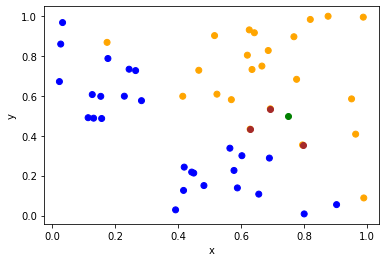

In [13]:
plt.scatter(x, y, c = true_label)
plt.scatter(x0, y0, c = "green")
plt.scatter(KNN_x, KNN_y, c = "brown")
plt.xlabel('x')
plt.ylabel('y')
plt.show()

**6. Based on that dataset with only the K nearest neighbors, I compute the number of "blue" and the number of "orange", then provide an estimation of the probability for the new observation to be blue.**

In [14]:
# Create a DataFrame to count the number of label "blue" and "orange"

import pandas as pd

KNN_df = pd.DataFrame(KNN)
KNN_df.columns =['x', 'y', 'color', 'distance']

print(KNN_df)

                    x                   y   color             distance
0  0.6925256358077336  0.5346158943058064  orange  0.06709368582732676
1  0.6283905001932043  0.4328406415826899  orange  0.13892174007794375
2  0.7949050343962443   0.353884946473118  orange  0.15285964471138702


In [15]:
# Count the number of "blue" and "orange"

KNN_df.color.value_counts(dropna = False)

orange    3
Name: color, dtype: int64

In [16]:
# Calculate the probability of "blue" and "orange"

prob = KNN_df.color.value_counts(normalize = True)

prob_df = pd.DataFrame(prob)

print(prob_df)

        color
orange    1.0


In [17]:
# Provide an estimation of the probability for the new observation to be blue

def probability_blue():
    if "blue" not in prob_df:
        print("The probability that the new observation to be blue is 0.")
    else:
        print("The probability that the new observation to be blue is %d" % ((prob_df.at["blue", "color"])*100))
        
print(probability_blue())

The probability that the new observation to be blue is 0.
None


**7. Based on that probability, assign a predicted class to my new observation.**

In [18]:
def prediction():
    if prob_df.at["orange", "color"] >= 0.5:
        print("The predicted class is orange.")
    else:
        print("The predicted class is blue.")
        
print(prediction())

The predicted class is orange.
None


**8. Set a different value for K and look at how it may change your prediction.**

In [22]:
for K in range(4, 20, 1):
    KNN_new = new_matrix[:K, :]
    KNN_x_new = KNN_new[:, 0].astype(float)
    KNN_y_new = KNN_new[:, 1].astype(float)
    KNN_df_new = pd.DataFrame(KNN_new)
    KNN_df_new.columns =['x', 'y', 'color', 'distance']
    prob_new = KNN_df_new.color.value_counts(normalize = True)
    prob_df_new = pd.DataFrame(prob_new)
    if prob_df_new.at["orange", "color"] >= 0.5:
        print("When K is equal to %d, the predicted class for (x0, y0) is orange." % K)
    else:
        print("When K is equal to %d, the predicted class for (x0, y0) is blue." % K)    

When K is equal to 4, the predicted class for (x0, y0) is orange.
When K is equal to 5, the predicted class for (x0, y0) is orange.
When K is equal to 6, the predicted class for (x0, y0) is orange.
When K is equal to 7, the predicted class for (x0, y0) is orange.
When K is equal to 8, the predicted class for (x0, y0) is orange.
When K is equal to 9, the predicted class for (x0, y0) is orange.
When K is equal to 10, the predicted class for (x0, y0) is orange.
When K is equal to 11, the predicted class for (x0, y0) is orange.
When K is equal to 12, the predicted class for (x0, y0) is orange.
When K is equal to 13, the predicted class for (x0, y0) is orange.
When K is equal to 14, the predicted class for (x0, y0) is orange.
When K is equal to 15, the predicted class for (x0, y0) is orange.
When K is equal to 16, the predicted class for (x0, y0) is orange.
When K is equal to 17, the predicted class for (x0, y0) is orange.
When K is equal to 18, the predicted class for (x0, y0) is orange.
W